In [91]:
import csv
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import interactive
import plotly
import plotly.plotly as py
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [92]:
# Loop through raw CSVs to add years in column header
years = [2005, 2006, 2007, 2008, 2009, 2010, 2011]
for year in years:
    
    #Append each needed column's name with the year:
    csv_df = pd.read_csv(f"veteran_data/us-veteran-suicides-raw/{year}.csv")
    
    for x in np.arange(2,8,1):
        csv_df.columns.values[x] = csv_df.columns.values[x] + f"_{year}"
        
    csv_df.to_csv(f"veteran_data/{year}.csv")

In [93]:
# Read CSVs
csv2005_df = pd.read_csv("veteran_data/2005.csv", index_col=0)
csv2006_df = pd.read_csv("veteran_data/2006.csv", index_col=0)
csv2007_df = pd.read_csv("veteran_data/2007.csv", index_col=0)
csv2008_df = pd.read_csv("veteran_data/2008.csv", index_col=0)
csv2009_df = pd.read_csv("veteran_data/2009.csv", index_col=0)
csv2010_df = pd.read_csv("veteran_data/2010.csv", index_col=0)
csv2011_df = pd.read_csv("veteran_data/2011.csv", index_col=0)

In [94]:
# Clean CSVs by dropping columns with missing information
cleaned2005 = csv2005_df.drop(columns=['vet_males', 'vet_males_p','vet_females','vet_females_p','vet_15_24','vet_18_29','vet_17_34','vet_25_34','vet_30_39','vet_25_44','vet_35_44','vet_40_49','vet_35-54','vet_45_54','vet_50_59','vet_45_64','vet_55_64','vet_60','vet_65','vet_rate','civ_rate'])
cleaned2006 = csv2006_df.drop(columns=['vet_males','vet_males_p','vet_females','vet_females_p','vet_15_24','vet_18_29','vet_17_34','vet_25_34','vet_30_39','vet_25_44','vet_35_44','vet_40_49','vet_35-54','vet_45_54','vet_50_59','vet_45_64','vet_55_64','vet_60','vet_65','vet_rate','civ_rate'])
cleaned2007 = csv2007_df.drop(columns=['vet_males','vet_males_p','vet_females','vet_females_p','vet_15_24','vet_18_29','vet_17_34','vet_25_34','vet_30_39','vet_25_44','vet_35_44','vet_40_49','vet_35-54','vet_45_54','vet_50_59','vet_45_64','vet_55_64','vet_60','vet_65','vet_rate','civ_rate'])
cleaned2008 = csv2008_df.drop(columns=['vet_males','vet_males_p','vet_females','vet_females_p','vet_15_24','vet_18_29','vet_17_34','vet_25_34','vet_30_39','vet_25_44','vet_35_44','vet_40_49','vet_35-54','vet_45_54','vet_50_59','vet_45_64','vet_55_64','vet_60','vet_65','vet_rate','civ_rate'])
cleaned2009 = csv2009_df.drop(columns=['vet_males','vet_males_p','vet_females','vet_females_p','vet_15_24','vet_18_29','vet_17_34','vet_25_34','vet_30_39','vet_25_44','vet_35_44','vet_40_49','vet_35-54','vet_45_54','vet_50_59','vet_45_64','vet_55_64','vet_60','vet_65','vet_rate','civ_rate'])
cleaned2010 = csv2010_df.drop(columns=['vet_males','vet_males_p','vet_females','vet_females_p','vet_15_24','vet_18_29','vet_17_34','vet_25_34','vet_30_39','vet_25_44','vet_35_44','vet_40_49','vet_35-54','vet_45_54','vet_50_59','vet_45_64','vet_55_64','vet_60','vet_65','vet_rate','civ_rate'])
cleaned2011 = csv2011_df.drop(columns=['vet_males','vet_males_p','vet_females','vet_females_p','vet_15_24','vet_18_29','vet_17_34','vet_25_34','vet_30_39','vet_25_44','vet_35_44','vet_40_49','vet_35-54','vet_45_54','vet_50_59','vet_45_64','vet_55_64','vet_60','vet_65','vet_rate','civ_rate'])

In [95]:
cleaned2005 = cleaned2005.drop(cleaned2005.columns[0], axis=1)
cleaned2006 = cleaned2006.drop(cleaned2006.columns[0], axis=1)
cleaned2007 = cleaned2007.drop(cleaned2007.columns[0], axis=1)
cleaned2008 = cleaned2008.drop(cleaned2008.columns[0], axis=1)
cleaned2009 = cleaned2009.drop(cleaned2009.columns[0], axis=1)
cleaned2010 = cleaned2010.drop(cleaned2010.columns[0], axis=1)
cleaned2011 = cleaned2011.drop(cleaned2011.columns[0], axis=1)

In [96]:
to_be_merged = ['cleaned2005', 'cleaned2006', 'cleaned2007', 'cleaned2008', 'cleaned2009', 'cleaned2010', 'cleaned2011']

In [97]:
# Merge CSVs to create new CSV
merged = pd.merge(cleaned2005, cleaned2006, how='outer', on='state')
merged = pd.merge(merged, cleaned2007, how='outer', on='state')
merged = pd.merge(merged, cleaned2008, how='outer', on='state')
merged = pd.merge(merged, cleaned2009, how='outer', on='state')
merged = pd.merge(merged, cleaned2010, how='outer', on='state')
merged = pd.merge(merged, cleaned2011, how='outer', on='state')
merged.to_csv('veteran_data/veteran_suicides_2005-2011.csv')

## Veteran Suicides in the United States (2005 - 2011)
Over the years, veterans consistently commit suicide at a much higher rate than the overall population.  Here we see that veterans take their own lives at about double the rate than non-veterans.  From 2005 to 2011, almost a fifth of all suicides in the United States were veterans.  The problem is increasing, as the average rate of suicide for veterans has increased from around eighteen per day to over twenty per day. 

In [98]:
# Open new CSV
veterans_df = pd.read_csv("veteran_data/veteran_suicides_2005-2011.csv")
veterans_df = veterans_df.drop(columns='Unnamed: 0')
veterans_df.head()

,state,vet_pop_2005,overall_pop_18_2005,vet_pop_p_2005,vet_suicides_2005,all_suicides_2005,vet_suicides_p_2005,vet_pop_2006,overall_pop_18_2006,vet_pop_p_2006,...,vet_pop_p_2010,vet_suicides_2010,all_suicides_2010,vet_suicides_p_2010,vet_pop_2011,overall_pop_18_2011,vet_pop_p_2011,vet_suicides_2011,all_suicides_2011,vet_suicides_p_2011
0,Alabama,403950,3344721,0.120772,135,535,0.252336,408917,3473558,0.117723,...,0.110360,156,679,0.229750,395753,3662910,0.108043,163,680,0.239706
1,Alaska,74482,446969,0.166638,24,131,0.183206,70067,478581,0.146406,...,0.140705,35,164,0.213415,72407,517799,0.139836,27,142,0.190141
2,Arizona,538880,4238996,0.127124,225,945,0.238095,558906,4521911,0.123600,...,0.111217,240,1093,0.219579,533608,4842927,0.110183,242,1091,0.221815
3,Arkansas,259304,2023819,0.128126,81,400,0.202500,258170,2110583,0.122322,...,0.112340,105,447,0.234899,238790,2221409,0.107495,89,447,0.199105
4,California,2193336,25543447,0.085867,633,3206,0.197442,2142367,26789221,0.079971,...,0.069784,705,3913,0.180169,1910994,28292703,0.067544,706,3923,0.179964


In [104]:
#Calculate the Suicides per 100,000 People
vet_per_cap_suic_per_year_list = []
for year in np.arange(2005,2012,1):
       vet_per_cap_suic_per_year_list.append(((veterans_df[f"vet_suicides_{year}"].sum())
                                              /(veterans_df[f"vet_pop_{year}"].sum()))*100000)

non_vet_suic_per_year_list = []
for year in np.arange(2005,2012,1):
       non_vet_suic_per_year_list.append(((veterans_df[f"all_suicides_{year}"].sum()
                                           -veterans_df[f"vet_suicides_{year}"].sum())
                                          /(veterans_df[f"overall_pop_18_{year}"].sum()
                                            -veterans_df[f"vet_pop_{year}"].sum()))*100000)

gen_pop_suic_per_year_list = []
for year in np.arange(2005,2012,1):
       gen_pop_suic_per_year_list.append(((veterans_df[f"all_suicides_{year}"].sum())
                                          /(veterans_df[f"overall_pop_18_{year}"].sum()))*100000)

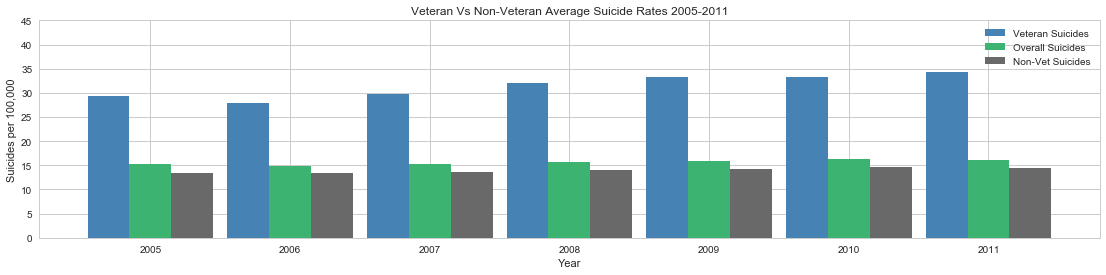

In [100]:
#Graph the Suicide Rates
sns.set(style="whitegrid")
x = np.arange(2005, 2012, 1) 
plt.figure(figsize=(19,4))

plt.bar(x-.3, vet_per_cap_suic_per_year_list, label="Veteran Suicides", width=.3, color='steelblue')
plt.bar(x, gen_pop_suic_per_year_list, label="Overall Suicides",width=.3, color='mediumseagreen')
plt.bar(x+.3, non_vet_suic_per_year_list, label="Non-Vet Suicides",width=.3, color='dimgrey')

plt.xlabel("Year")
plt.ylabel("Suicides per 100,000")
plt.title("Veteran Vs Non-Veteran Average Suicide Rates 2005-2011")
plt.legend()
plt.ylim(0, 45)
plt.savefig("Vet_vs_Non-Vet_Suicide_Rates")
plt.show()

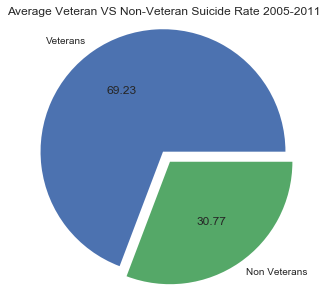

In [103]:
# Calculate the Suicides Rates per 100,000 People:
x = np.arange(2005,2012,1)
y1 = []
y2 = []
y3 = []
y4 = []

for year in np.arange(2005,2012,1):
    y1.append(veterans_df[f"vet_pop_{year}"].sum())
    y2.append(veterans_df[f"overall_pop_18_{year}"].sum()-veterans_df[f"vet_pop_{year}"].sum())
    y3.append(veterans_df[f"vet_suicides_{year}"].sum())
    y4.append(veterans_df[f"all_suicides_{year}"].sum()-veterans_df[f"vet_suicides_{year}"].sum())

plt.figure(figsize=(5,5))
plt.title("Average Veteran VS Non-Veteran Suicide Rate 2005-2011 ")
plt.pie(
    [np.mean(vet_per_cap_suic_per_year_list),np.mean(non_vet_suic_per_year_list)],
    explode=[.1,0],
    labels=["Veterans", "Non Veterans"],
    autopct='%.2f',
    pctdistance=.6)
    # colors=['red', 'blue']
plt.axis("equal")
plt.savefig("Avg_Suicide_Vet_vs_NonVet")
plt.show()

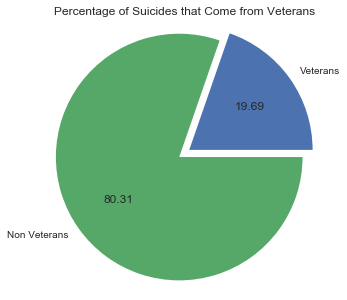

In [81]:
# What percentage of suicides come from veterans
total_vet_suicides_list = []
total_non_vet_suicides_list = []
for year in np.arange(2005,2012,1):
    total_vet_suicides_list.append(veterans_df[f"vet_suicides_{year}"].sum())
    total_non_vet_suicides_list.append(veterans_df[f"all_suicides_{year}"].sum()-veterans_df[f"vet_suicides_{year}"].sum())
total_vet_suicides = np.sum(total_vet_suicides_list)
total_non_vet_suicides = np.sum(total_non_vet_suicides_list)

plt.figure(figsize=(5,5))
plt.title("Percentage of Suicides that Come from Veterans")
plt.pie(
    [total_vet_suicides, total_non_vet_suicides],
    explode=[.1,0],
    labels=["Veterans", "Non Veterans"],
    autopct='%.2f',
    pctdistance=.6)
plt.axis('equal')
plt.savefig("Percent_of_Vet_Suicides")
plt.show()

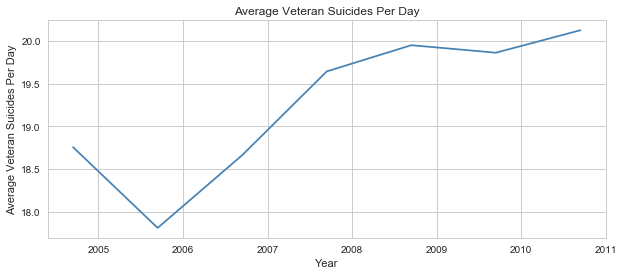

In [82]:
# Average veteran suicides per day
sns.set(style="whitegrid")
x = np.arange(2005, 2012, 1)
plt.figure(figsize=(10,4))
plt.title("Average Veteran Suicides Per Day")
plt.xlabel("Year")
plt.ylabel("Average Veteran Suicides Per Day")
plt.plot(x-.3, np.divide(total_vet_suicides_list, 365), label="Average Veteran Suicides Per Day", color='steelblue')
plt.savefig("Avg_Daily_Vet_Suicides")
plt.show()

## Veteran Suicides by State (2005 - 2011)
The suicide rates by state shows Montana, Idaho, Nevada, and New Mexico had the highest rates of veteran suicides, in which the four states are averaging at the rate of 50.49 suicides per 100,000 people.  In further analysis, we found that the states with the highest suicide rates also had very few VHA centers in their respective states.

In [52]:
# Read CSVs
state_df = pd.read_csv("veteran_data/50_usstates_data.csv")
vha_df = pd.read_csv("veteran_data/VHA_Center.csv", encoding="ISO-8859-1")

In [114]:
# Group by state  
# Calculating the mean of vet suicides data for years 2005 to 2011 by state 
# Suicide rate calculation

vet_suicideratelist = []
nonvet_suicideratelist = []
statelist= []
vets_state = veterans_df.set_index('state')

for index,row in vets_state.iterrows():
    
    #Overall population from 2005 to 2011 satewise
    overallpop = (row[1] + row[7]+ row[13] + row[19] +row[25] + row[31] + row[37])
    vetpop = (row[0] + row[6] + row[12] + row[18] + row[24] + row[30] + row[36])
    nonvetpop = (overallpop - vetpop)
    
    overall_suicide = (row[4] + row[10]+ row[16]+ row[22]+row[28]+row[34]+row[40])
    vet_suicide = (row[3] + row[9]+ row[15]+ row[21]+row[27]+row[33]+row[39])
    nonvet_suicide = (overall_suicide - vet_suicide)
    
    vet_suiciderate = round((vet_suicide / vetpop) *100000, 2)
    nonvet_suiciderate = round((nonvet_suicide / nonvetpop) *100000,2)
    
    vet_suicideratelist.append(vet_suiciderate)
    nonvet_suicideratelist.append(nonvet_suiciderate)
    statelist.append(index)

# Turn list into to dataframe
suicide_state = pd.DataFrame({'statelist':statelist, 'vet_suicideratelist':vet_suicideratelist, 
                              'nonvet_suicideratelist' : nonvet_suicideratelist})

# Reorder columns 
suicide_state = suicide_state[['statelist', 'vet_suicideratelist','nonvet_suicideratelist']]

# Sort based on value 
vets_suicide_state = suicide_state.sort_values(by=['vet_suicideratelist'], ascending=False)
vets_suicide_state = vets_suicide_state.reset_index(drop=True)
#vets_suicide_state.head()

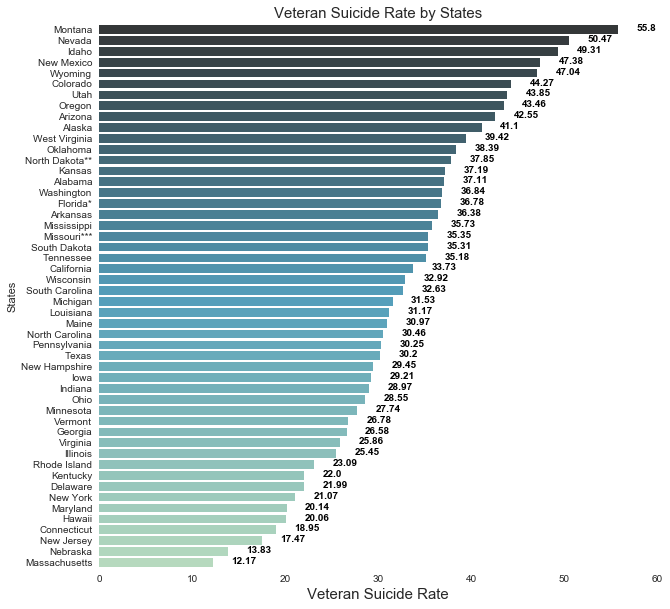

In [89]:
# Graph plot state by state comparison of VETERAN suicide
fontsize = 15
sns.set(style="white")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# x position and y position data 
y_pos = vets_suicide_state['statelist']
x_pos = vets_suicide_state['vet_suicideratelist']

# Setting the colors
sns.set_color_codes("pastel")
# color = ["#DF0101", "#B40404", "#DF3A01", "#FF8000", "#FAAC58"]
sns.barplot(x_pos, y_pos,
            label="Total", palette="GnBu_d")

plt.xlim(0,60,5)

for i, v in enumerate(x_pos):
    plt.text(v + 2, i + .15, str(v), color='black', fontweight='bold', fontsize = 10)

# Add a legend and informative axis label
plt.title("Veteran Suicide Rate by States",fontsize = fontsize)
plt.xlabel("Veteran Suicide Rate", fontsize= fontsize)
plt.ylabel("States")
sns.despine(left=True, bottom=True)
plt.savefig("Veteran_Sucide_Rate")
plt.show()

In [55]:
# Create new dataframe and sort values for non-vet suicides by state
nonvet_suicide_state = suicide_state[['statelist', 'nonvet_suicideratelist', 'vet_suicideratelist']]
nonvet_suicide_state = nonvet_suicide_state.sort_values(by=['nonvet_suicideratelist'], ascending=False)

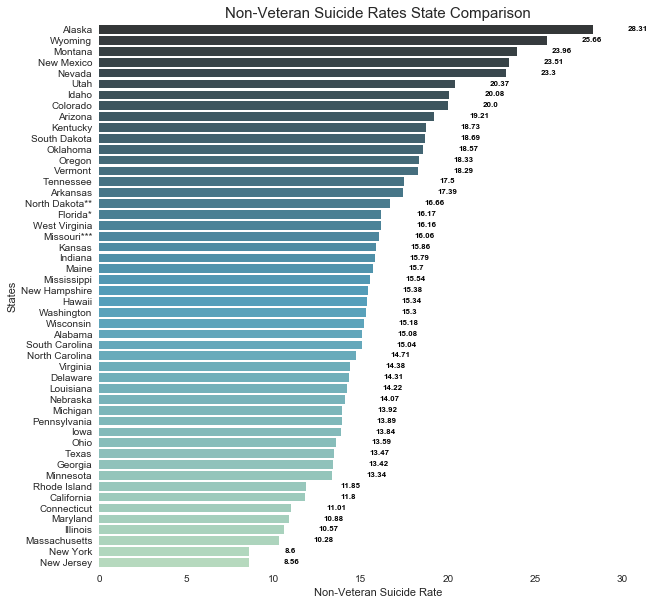

In [79]:
# Graph plot State by state comparison of Non VETERAN Suicide 
sns.set(style="white")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# x position and y position data 
y_pos = nonvet_suicide_state['statelist']
x_pos =nonvet_suicide_state['nonvet_suicideratelist']

# Setting the colors
sns.set_color_codes("pastel")
#color = ["#DF0101", "#B40404", "#DF3A01", "#FF8000", "#FAAC58"]
sns.barplot(x_pos, y_pos,
            label="Total", palette="GnBu_d")

plt.xlim(0,32,5)
for i, v in enumerate(x_pos):
    plt.text(v + 2, i + .15, str(v), color='black', fontweight='bold', fontsize = 8 )

# Add a legend and informative axis label
plt.title("Non-Veteran Suicide Rates State Comparison",fontsize = 15)
plt.xlabel("Non-Veteran Suicide Rate")
plt.ylabel("States")
sns.despine(left=True, bottom=True)
plt.savefig("Non_Veteran_Sucide_Rate")
plt.show()

In [60]:
# Merge CSVs and group by VHA Centers
vha_state_merge = pd.merge(state_df, vha_df, how = "outer", on = "state abbreviation")
vhacount_df = vha_state_merge.groupby(["state"]).count()
vhacount_df = vhacount_df.reset_index()
vhacount_df.columns

# Create new dataframe with sorted vha centers
vhasort_df = vhacount_df.sort_values(by=["Facility"], ascending = False)
vhasort_df = vhasort_df.reset_index(drop=True)

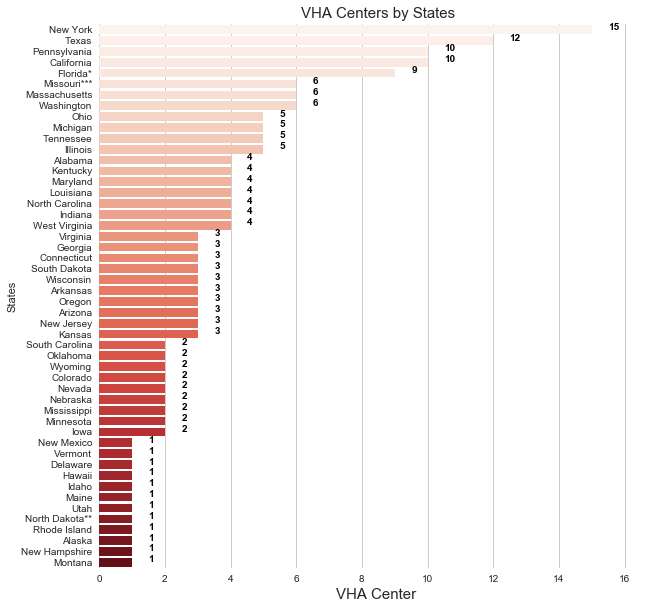

In [77]:
# Graph plot state by state comparison of VHA centers
fontsize = 15
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# x position and y position data 
y_pos = vhasort_df['state']
x_pos =vhasort_df['Facility']

# Setting the colors
sns.set_color_codes("pastel")
# color = ["#DF0101", "#B40404", "#DF3A01", "#FF8000", "#FAAC58"]
sns.barplot(x_pos, y_pos,
            label="Total", palette="Reds")

plt.xlim(0,17,5)
for i, v in enumerate(x_pos):
    plt.text(v + .5, i , str(v), color='black', fontweight='bold', fontsize = 10)

# Add a legend and informative axis label
plt.title("VHA Centers by States",fontsize = fontsize)
plt.xlabel("VHA Center ", fontsize= fontsize)
plt.ylabel("States")
sns.despine(left=True, bottom=True)
plt.savefig("VHA_Centers_US")
plt.show()

In [62]:
state_merge = pd.merge(veterans_df, vhacount_df, how = 'outer', on = 'state')
state_merge = state_merge.set_index('state')
state_merge.shape

(50, 51)

In [76]:
state_vet_suicide_list = []
state_vet_pop_list = []
state_list = []
state_c = []
vha_center_list = []

for index, row in state_merge.iterrows():
    total_pop = (row[1] + row[7] + row[13] + row[19] + row[25] + row[31] + row[37])
    vet_state_pop = (row[0] + row[6] + row[12] + row[18] + row[24] + row[30] + row[36])
    vet_state_suicide = (row[3] + row[9] + row[15] + row[21] + row[27] + row[33] + row[39])
    vet_suicide_rate = round((vet_state_suicide / vet_state_pop) *100000, 2)
    facilities = row[48]
    
    state_vet_pop_list.append(vet_state_pop)
    state_vet_suicide_list.append(vet_suicide_rate)
    state_list.append(index)
    vha_center_list.append(facilities)

state_by_state_df = pd.DataFrame({'State': state_list, 'Vet Suicide Rate': state_vet_suicide_list,
                                  'Vet Population': state_vet_pop_list, 'VHA Centers': vha_center_list, 
                                  'State Code': state_df['state abbreviation']})
state_by_state_df = state_by_state_df[['State Code', 'State', 'Vet Suicide Rate', 
                                       'Vet Population', 'VHA Centers']]

In [69]:
for col in state_by_state_df.columns:
    state_by_state_df[col] = state_by_state_df[col].astype(str)

scl = [[0.0, 'rgb(204, 255, 102)'],[0.4, 'rgb(179, 255, 26)'],\
            [0.6, 'rgb(136, 204, 0)'],[0.8, 'rgb(85, 128, 0)'],[1.0, 'rgb(0, 128, 0)']]

state_by_state_df['text'] = state_by_state_df['State'] + ':' + state_by_state_df['State Code'] + '<br>' +\
'Veterans Population' + state_by_state_df['Vet Population'] + '<br>' +\
'Suicide Rate' + state_by_state_df['Vet Suicide Rate'] + '<br>' + 'VHA Count' + state_by_state_df['VHA Centers']

In [72]:
state_data = [dict(
        type = 'choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = state_by_state_df['State Code'],
        z= state_by_state_df['Vet Suicide Rate'],
        locationmode = 'USA-states',
        text = state_by_state_df['text'],
        marker = dict(
            line = dict(
                color = 'rgb(51,51,51)',
                width = 2
            )),
        colorbar = dict(
                title = "Veteran Suicide <br>State Comparison",
                titleside = 'left',
                tickmode = 'array',
                tickvals = [55,35,15],
                ticktext = ['High','Medium','Less'],
                ticks = 'outside'
                )
            )]

layout = dict(
        title = 'Veteran Suicides State Comparison',
        geo = dict(
            scope = 'usa',
            projection=dict(type = 'albers usa'),
            showlakes = True,
            lakecolor = 'rgb(0, 138, 230)'),
            )

In [75]:
fig = dict(data= state_data, layout = layout)
choromap = go.Figure(data = state_data, layout = layout)
plotly.offline.plot(choromap)

'file://C:\\Users\\alain\\desktop\\Project One\\temp-plot.html'

## Veteran Suicides by Age Group
When analyzing the data by age group, there was a nineteen percent higher risk of suicides among veterans compared to
their civilian counterparts.  As a whole, older veterans make up for the majority of suicides; roughly sixty-nine percent were age fifty-five or older.

In [14]:
# Read CSVs and create dataframe
vets_df = pd.read_csv("veteran_data/veteran_suicide_age_2005-2008.csv")
vets_age_df = vets_df
vets_age_df = vets_age_df.set_index('age_range')
vets_age_df.head(7)

,vet_suicide_2005,vet_suicide_2006,vet_suicide_2007,vet_suicide_2008,Nonvet_suicide_2005,Nonvet_suicide_2006,Nonvet_suicide_2007,Nonvet_suicide_2008,vet_pop_16sates,v_rate_pop,nonvet_pop_16sates,nv_rate_pop
age_range,,,,,,,,,,,,
18-29,12,11,23,15,86,552,759,910,65974,0.201657,4442150,0.088096
30-39,71,83,92,83,865,882,861,882,302379,0.150336,4997418,0.108549
40-49,183,195,185,185,1008,994,1049,1017,544281,0.210210,4804281,0.111739
50-59,486,453,495,487,1092,1012,1062,1083,808175,0.237569,4852566,0.114216
60-69,385,450,525,553,495,321,810,615,1412933,0.077739,2969481,0.106765
70-79,494,565,485,462,427,196,216,226,1094061,0.200000,1424385,0.102050
80+,808,712,595,821,97,197,148,153,1269990,0.280000,627695,0.110654


In [15]:
# Calculating standard deviations for vets and non vets by age group
std_18_29 = st.stats.sem(vets_age_df.loc['18-29','vet_suicide_2005':'vet_suicide_2008'])/4
std_30_39 = st.stats.sem(vets_age_df.loc['30-39','vet_suicide_2005':'vet_suicide_2008'])/4
std_40_49 = st.stats.sem(vets_age_df.loc['40-49','vet_suicide_2005':'vet_suicide_2008'])/4
std_50_59 = st.stats.sem(vets_age_df.loc['50-59','vet_suicide_2005':'vet_suicide_2008'])/4
std_60_69 = st.stats.sem(vets_age_df.loc['60-69','vet_suicide_2005':'vet_suicide_2008'])/4
std_70_79 = st.stats.sem(vets_age_df.loc['70-79','vet_suicide_2005':'vet_suicide_2008'])/4
std_80 = st.stats.sem(vets_age_df.loc['80+','vet_suicide_2005':'vet_suicide_2008'])/4 

std_18_29_nonvet = st.stats.sem(vets_age_df.loc['18-29','Nonvet_suicide_2005':'Nonvet_suicide_2008'])/4
std_30_39_nonvet = st.stats.sem(vets_age_df.loc['30-39','Nonvet_suicide_2005':'Nonvet_suicide_2008'])/4
std_40_49_nonvet = st.stats.sem(vets_age_df.loc['40-49','Nonvet_suicide_2005':'Nonvet_suicide_2008'])/4
std_50_59_nonvet = st.stats.sem(vets_age_df.loc['50-59','Nonvet_suicide_2005':'Nonvet_suicide_2008'])/4
std_60_69_nonvet = st.stats.sem(vets_age_df.loc['60-69','Nonvet_suicide_2005':'Nonvet_suicide_2008'])/4
std_70_79_nonvet = st.stats.sem(vets_age_df.loc['70-79','Nonvet_suicide_2005':'Nonvet_suicide_2008'])/4
std_80_nonvet = st.stats.sem(vets_age_df.loc['80+','Nonvet_suicide_2005':'Nonvet_suicide_2008'])/4

In [16]:
# Create lists to store standard deviation calculations
vet_suc_age_list = (vets_age_df['vet_suicide_2005']+vets_age_df['vet_suicide_2006']+
                    vets_age_df['vet_suicide_2007']+vets_age_df['vet_suicide_2008'])
vet_suc_pop = vets_age_df['vet_pop_16sates']
nonvet_suc_age_list = (vets_age_df['Nonvet_suicide_2005']+vets_age_df['Nonvet_suicide_2006']+
                       vets_age_df['Nonvet_suicide_2007']+vets_age_df['Nonvet_suicide_2008'])
nonvet_suc_pop = vets_age_df['nonvet_pop_16sates']

In [17]:
# Create new dataframe with lists and rename columns
data = [['18-29',vet_suc_age_list[0],nonvet_suc_age_list[0],vet_suc_pop[0],nonvet_suc_pop[0],std_18_29,std_18_29_nonvet],
        ['30-39',vet_suc_age_list[1],nonvet_suc_age_list[1],vet_suc_pop[1],nonvet_suc_pop[1],std_30_39,std_30_39_nonvet],
        ['40-49',vet_suc_age_list[2],nonvet_suc_age_list[2],vet_suc_pop[2],nonvet_suc_pop[2],std_40_49,std_40_49_nonvet],
        ['50-59',vet_suc_age_list[3],nonvet_suc_age_list[3],vet_suc_pop[3],nonvet_suc_pop[3],std_50_59,std_50_59_nonvet],
        ['60-69',vet_suc_age_list[4],nonvet_suc_age_list[4],vet_suc_pop[4],nonvet_suc_pop[4],std_60_69,std_60_69_nonvet],
        ['70-79',vet_suc_age_list[5],nonvet_suc_age_list[5],vet_suc_pop[5],nonvet_suc_pop[5],std_70_79,std_70_79_nonvet],
        ['80+',vet_suc_age_list[6],nonvet_suc_age_list[6],vet_suc_pop[6],nonvet_suc_pop[6],std_80,std_80_nonvet]]
data_df = pd.DataFrame(data,columns=['Age Group','Total Vet Suicide','Total Non-Vet Suicide','Veterans Population',
                                     'Non-Veterans Population','Vet Std Error','Non-Vet Std Error'])
final_data = data_df.set_index('Age Group')
vet_rate = ((final_data['Total Vet Suicide']/final_data['Veterans Population'])*100000)/4
non_vet_rate = ((final_data['Total Non-Vet Suicide']/final_data['Non-Veterans Population'])*100000)/4
vet_rate.round(2)
non_vet_rate.round(2)
final_data

,Total Vet Suicide,Total Non-Vet Suicide,Veterans Population,Non-Veterans Population,Vet Std Error,Non-Vet Std Error
Age Group,,,,,,
18-29,61,2307,65974,4442150,0.679882,44.821332
30-39,329,3490,302379,4997418,1.077105,1.386317
40-49,748,4068,544281,4804281,0.677003,2.917262
50-59,1921,4249,808175,4852566,2.325974,4.472573
60-69,1913,2241,1412933,2969481,9.483195,25.705742
70-79,2006,1065,1094061,1424385,5.553246,13.486249
80+,2936,595,1269990,627695,13.080281,5.115718


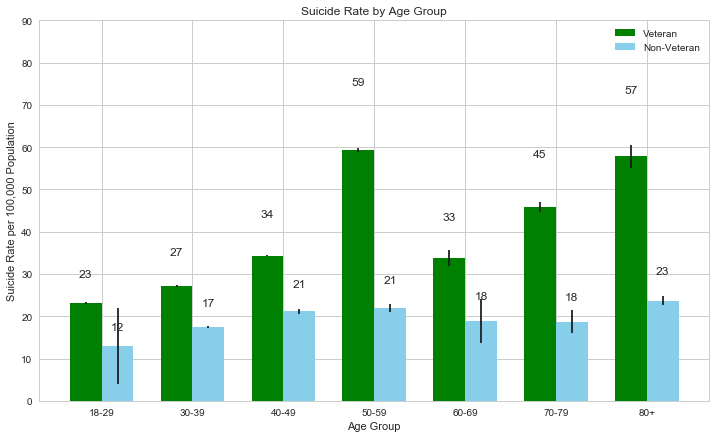

In [83]:
grand_total_vet_suicide = final_data["Total Vet Suicide"].sum()
percent_vet_suicide = (final_data["Total Vet Suicide"]/grand_total_vet_suicide)*100
suicide_percentage = percent_vet_suicide.round(2)

# Plot Bar Chart for final_data
N = 7
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind,vet_rate, width, color='green', yerr=0.2*final_data['Vet Std Error'])


rects2 = ax.bar(ind+width, non_vet_rate, width, color='skyblue', yerr=0.2*final_data['Non-Vet Std Error'])

# Add some text for labels, title and axes ticks
ax.set_ylabel('Suicide Rate per 100,000 Population')
ax.set_xlabel('Age Group')
ax.set_title('Suicide Rate by Age Group')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'))
plt.ylim(0,90,10)
ax.legend((rects1[0], rects2[0]), ('Veteran', 'Non-Veteran'))
sns.set(rc={'figure.figsize':(12,7)})

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.25*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
plt.savefig("Suicide_by_Age_Group")
plt.show()

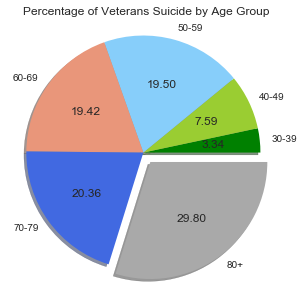

In [84]:
# Plot pie chart
plt.figure(figsize=(5,5))
plt.title("Percentage of Veterans Suicide by Age Group")
colors = ['green', 'yellowgreen', 'lightskyblue', 'darksalmon','royalblue','darkgray']
explode = (0, 0, 0, 0, 0, 0.1)
plt.pie(
    [percent_vet_suicide['30-39'],percent_vet_suicide['40-49'],percent_vet_suicide['50-59'],percent_vet_suicide['60-69'],percent_vet_suicide['70-79'],percent_vet_suicide['80+']],
    explode=explode,colors = colors,
    labels=["30-39","40-49","50-59","60-69","70-79","80+"],
    autopct='%.2f',
    pctdistance=.6,shadow=True)
plt.axis('equal')
plt.savefig("Percent_Vet_Suicide_Age_Group")
plt.show()

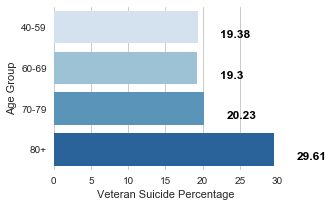

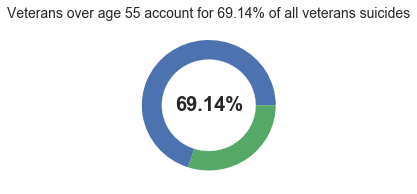

In [85]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(4, 3))

# Load the dataset
y_pos = ["40-59","60-69","70-79","80+"]
x_pos =[suicide_percentage['50-59'],suicide_percentage['60-69'],suicide_percentage['70-79'],suicide_percentage['80+']]
# Plot the Suicide rate
sns.set_color_codes("pastel")
sns.barplot(x_pos, y_pos,
            label="Percentage", palette="Blues")
plt.xlim(0,30,10)

for i, v in enumerate(x_pos):
    plt.text(v + 3, i + .25, str(v), color='black', fontweight='bold', fontsize = 12 )

# Add a legend and informative axis label

plt.xlabel("Veteran Suicide Percentage")
plt.ylabel("Age Group")
sns.despine(left=True, bottom=True)
plt.savefig("Veteran_Sucide_Rate")
plt.show()


size_of_groups=[70,30]
f, ax = plt.subplots(figsize=(3, 3))
# Create a pieplot
plt.pie(size_of_groups)
#plt.show()
text = '69.14%'
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
kwargs = dict(size=20, fontweight='bold', va='center')
ax.text(0, 0, text, ha='center', **kwargs)
plt.title("Veterans over age 55 account for 69.14% of all veterans suicides",fontsize = 14)
interactive(False)
plt.savefig("Vet_Suicides_Over55_Age_Group")
plt.show()

## Veteran Suicides by Gender
When analyzing the veteran suicide data by gender, there was noticeably a higher rate of suicide among male veterans than female veterans.  The overall average of the rate of male suicides is about forty-three percent.  In the course of ten years (2005-2014), there was an increase in suicide rates of male veterans by almost ten percent.  Whereas, female veterans suicide rates have been fairly consistent throughout the ten years with an overall average of twelve percent.

In [22]:
# Read and create dataframe for female vets
female_vets_df = pd.read_csv("veteran_data/Vet Suicides 2005-2014 (Females).csv")
female_vets_df = female_vets_df.set_index("female")
female_vets_df

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
female,,,,,,,,,,
18-29,6.7,4.7,10.2,5.4,15.2,11.1,19.3,12.9,15.7,11.0
30-39,13.8,10.9,15.7,15.9,14.9,15.3,13.5,14.4,17.4,17.6
40-49,27.4,7.8,14.8,12.8,16.7,17.4,18.1,20.3,20.6,22.7
50-59,7.5,12.9,13.8,25.3,18.1,18.8,18.1,18.1,11.8,20.0
60-69,4.8,6.8,8.6,4.0,9.0,19.4,14.7,11.9,9.7,14.5
70-79,25.9,5.3,0.0,0.0,10.8,0.0,10.6,31.4,0.0,14.7
80+,15.3,7.8,8.2,17.7,0.0,0.0,5.2,0.0,5.7,0.0


In [23]:
# Read and create dataframe for male vets
male_vets_df = pd.read_csv("veteran_data/Vet Suicides 2005-2014 (Males).csv")
male_vets_df = male_vets_df.set_index("male")
male_vets_df

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
male,,,,,,,,,,
18-29,27.8,48.2,37.4,48.4,45.5,55.4,60.4,67.0,74.6,73.3
30-39,44.7,44.3,43.1,40.0,45.1,47.7,54.3,49.2,51.5,55.5
40-49,48.6,40.8,49.1,50.6,46.4,44.8,51.8,46.6,46.3,45.6
50-59,39.3,44.0,41.5,45.9,45.6,45.8,50.2,45.4,39.4,43.6
60-69,31.1,32.9,32.4,38.1,32.4,32.8,31.1,30.0,32.0,33.1
70-79,31.5,34.7,30.9,33.2,34.0,32.7,33.3,36.4,42.0,34.5
80+,41.5,38.0,38.9,41.5,43.0,36.4,44.6,45.7,44.9,46.7


In [107]:
# Calculate averages for female vets
female_avgs = []
for column in female_vets_df:
    avgs = (female_vets_df[column]).mean()
    female_avgs.append(avgs)
# Calculate averages for male vets
male_avgs = []
for column in male_vets_df:
    avgs = (male_vets_df[column]).mean()
    male_avgs.append(avgs)
# Calculate the overall averages in the course of 10 years for male and female vets
male_overall_avg = (sum(male_avgs))/10
female_overall_avg = (sum(female_avgs))/10

# Female vet overall average in course of 10 years
female_overall_avg = (sum(female_avgs))/10
female_overall_avg
# Male vet overall average in course of 10 years
male_overall_avg = (sum(male_avgs))/10
male_overall_avg

# Calculate the total avgs for vets    
total_list = [male + female for male, female in zip(male_avgs, female_avgs)]
total_avg_list = [x / 2 for x in total_list]

# Create a list that holds the years
years_list = ["2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014"]

# Create new datafame with averages
avgs_df = pd.DataFrame({"Female": female_avgs, "Male": male_avgs, "Year": years_list, "Total Average": total_avg_list})
avgs_df = avgs_df.set_index("Year")
avgs_df.round(2)

,Female,Male,Total Average
Year,,,
2005,14.49,37.79,26.14
2006,8.03,40.41,24.22
2007,10.19,39.04,24.61
2008,11.59,42.53,27.06
2009,12.10,41.71,26.91
2010,11.71,42.23,26.97
2011,14.21,46.53,30.37
2012,15.57,45.76,30.66
2013,11.56,47.24,29.40


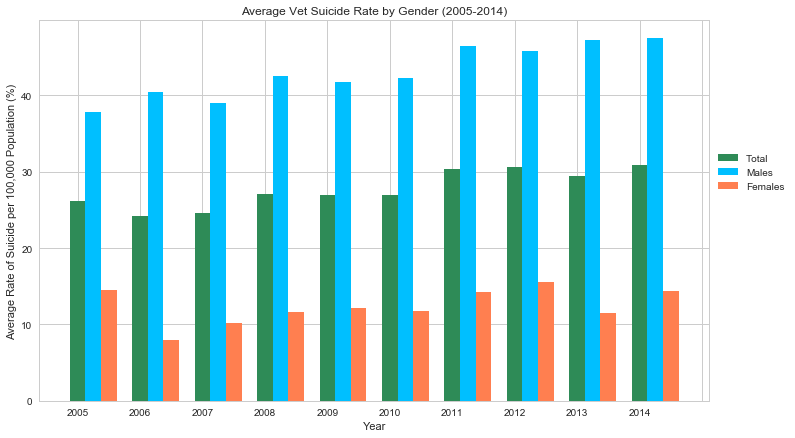

In [109]:
# Combine averages into a list for plotting
avgs_list = [male_avgs, female_avgs]
# Give chart title, labels, and ticks
sns.set_style("whitegrid")
plt.title("Average Vet Suicide Rate by Gender (2005-2014)")
plt.xlabel("Year")
plt.ylabel("Average Rate of Suicide per 100,000 Population (%)")
plt.xticks(np.arange(11), years_list)
# Plotting bar chart
x = np.arange(10)
plt.bar(x + 0.00, total_avg_list, color= 'seagreen', width = 0.25, label="Total")
plt.bar(x + 0.25, avgs_list[0], color = 'deepskyblue', width = 0.25, label="Males")
plt.bar(x + 0.50, avgs_list[1], color = 'coral', width = 0.25, label="Females")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.6))
plt.savefig("Vet_Suicide_Gender_Total")
plt.show()

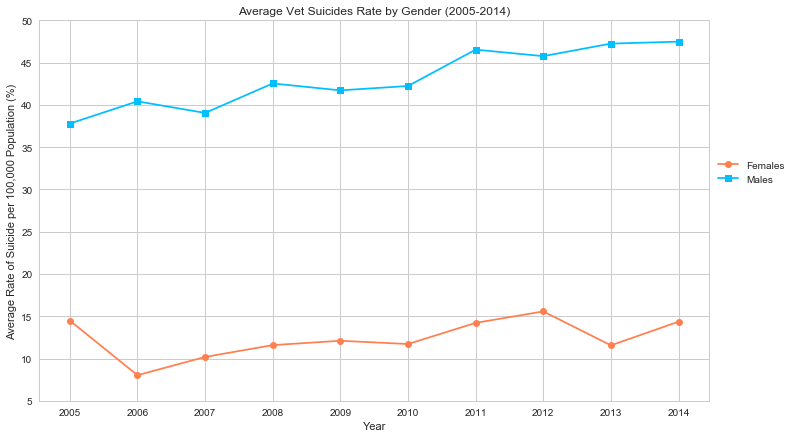

In [110]:
# Give chart titles, labels, and limits
plt.title("Average Vet Suicides Rate by Gender (2005-2014)")
plt.xlabel("Year")
plt.ylabel("Average Rate of Suicide per 100,000 Population (%)")
#plt.xlim(2005, 2014)
plt.ylim(5, 50)
# Create handles for legend and plot line graph with grid
Female, = plt.plot(years_list, female_avgs, marker="o", color="coral", label="Females")
Male, = plt.plot(years_list, male_avgs, marker="s", color="deepskyblue", label="Males")
plt.legend(handles=[Female, Male], loc='center left', bbox_to_anchor=(1, 0.6))
plt.savefig("Vet_Suicides_Gender")
plt.show()